<a href="https://colab.research.google.com/github/nichu12/stock-market-prediction/blob/main/Stockanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from datetime import date,timedelta
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [ ]:
stockname = 'IBM'
date = date.today()
pred_date = date + timedelta(1)
df = web.DataReader(stockname, data_source='yahoo', start='2012-01-01', end=date)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,188.710007,186.000000,186.729996,186.300003,5646000.0,134.881241
2012-01-04,186.330002,184.940002,185.570007,185.539993,4346700.0,134.330948
2012-01-05,185.029999,183.100006,184.809998,184.660004,4463100.0,133.693863
2012-01-06,184.479996,182.309998,184.389999,182.539993,4897100.0,132.158981
2012-01-09,182.270004,180.270004,182.199997,181.589996,5201200.0,131.471176
...,...,...,...,...,...,...
2021-04-26,143.630005,141.479996,142.419998,141.570007,4710800.0,141.570007
2021-04-27,142.559998,140.750000,141.690002,142.009995,3884000.0,142.009995
2021-04-28,143.399994,142.100006,142.919998,143.000000,3768100.0,143.000000


In [ ]:
df.shape

(2347, 6)

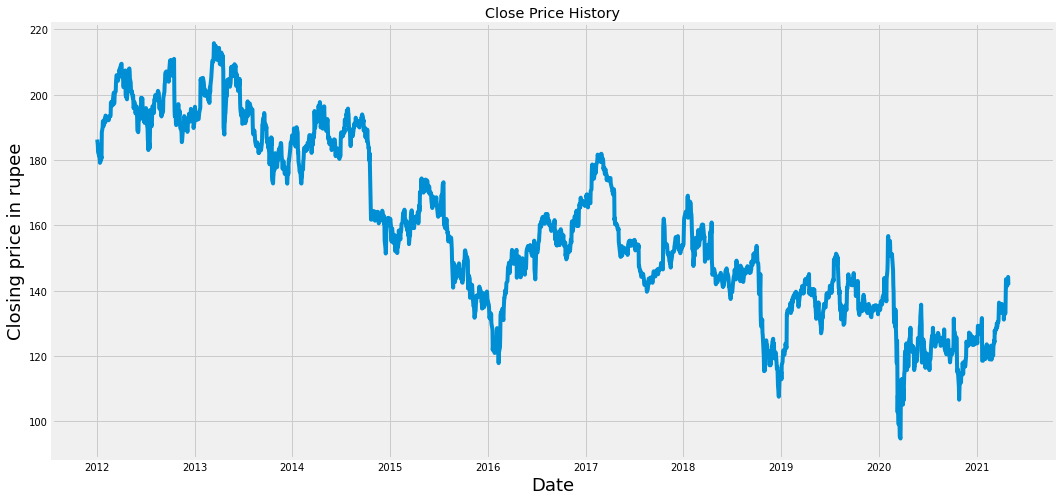

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price in rupee', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

1878

In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.75625879],
       [0.74997928],
       [0.74270844],
       ...,
       [0.39849625],
       [0.40874169],
       [0.38924238]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.75625879, 0.74997928, 0.74270844, 0.72519203, 0.71734277,
       0.7150293 , 0.72337442, 0.70874991, 0.69726516, 0.70420556,
       0.7130464 , 0.70850205, 0.77460136, 0.78666441, 0.8027761 ,
       0.80112364, 0.79492683, 0.79063046, 0.80748573, 0.80831202,
       0.80847718, 0.79947118, 0.81690488, 0.81012977, 0.81450883,
       0.81120379, 0.81269109, 0.80682472, 0.80847718, 0.80517227,
       0.80542013, 0.81178222, 0.81508714, 0.81483928, 0.8188052 ,
       0.84970667, 0.85094598, 0.84904566, 0.85276372, 0.84243571,
       0.84904566, 0.85962154, 0.87490706, 0.84681478, 0.85102869,
       0.86788396, 0.87457649, 0.87771625, 0.90068575, 0.90845244,
       0.91902832, 0.9191109 , 0.91671485, 0.90456909, 0.90820458,
       0.91481453, 0.91473183, 0.93365283, 0.92877791, 0.92968678])]
[0.9377840338711563]

[array([0.75625879, 0.74997928, 0.74270844, 0.72519203, 0.71734277,
       0.7150293 , 0.72337442, 0.70874991, 0.69726516, 0.70420556,
       0.7130464 , 0.70850205, 0.774

In [ ]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [ ]:
#LSTM algorithm to reshape the trained datasets
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1818, 60, 1)

In [ ]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = ( x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compiling the model
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1818/1818 [==============================] - 45s 23ms/step - loss: 0.0043


In [ ]:
#Creating the testing dataset
test_data=scaled_data[training_data_len - 60:, :]
x_test = []
y_test =dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
x_test=np.array(x_test)

In [ ]:
#reshaping the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Predicting values by the model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Returning to RMSE
rmse = np.sqrt( np.mean (predictions - y_test) ** 2)
rmse

3.216131458404476

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


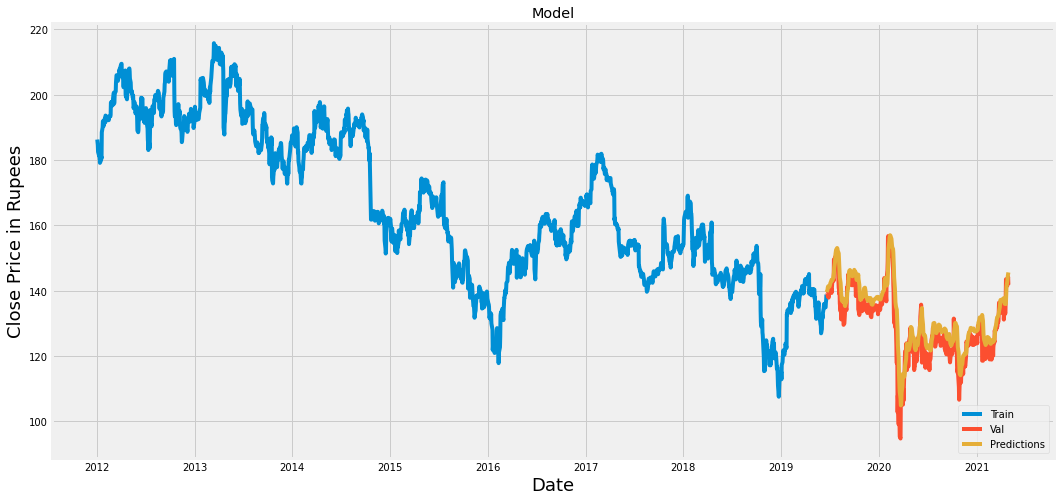

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in Rupees', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
#returning the actual value price and predicted price
valid

,Close,Predictions
Date,,
2019-06-21,139.199997,139.590012
2019-06-24,139.350006,140.321320
2019-06-25,138.360001,140.978790
2019-06-26,138.520004,141.283539
2019-06-27,138.520004,141.402451
...,...,...
2021-04-26,141.570007,142.921188
2021-04-27,142.009995,143.982300
2021-04-28,143.000000,144.611893


In [ ]:
#getting the estimating price
quote = web.DataReader(stockname, data_source='yahoo', start='2012-01-01', end=pred_date)
new_df=quote.filter(['Close'])
#retrieving the last 30 days datasets and converting the dataframe to an array
last_60_days = new_df[-60:].values
#scaling the data btw 0 - 1
last_60_days_scaled = scaler.transform(last_60_days)
#empty list
X_test = []
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
#reshape the dataset
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))
#Get the predicted value
pred_price = model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[145.59146]]


In [ ]:
quote2 = web.DataReader(stockname, data_source='yahoo', start=date, end=date)
print(quote2['Close'])

KeyError: ignored

In [ ]:
print('The actual value of the stock dataset')
print(quote2['Close'])
print('The predicted value of the stock dataset')
print(pred_price)

The actual value of the stock dataset


NameError: ignored

In [ ]:
analyse = pred_price - int(quote2['Close'])
print(analyse)

NameError: ignored

In [ ]:
if(analyse>=0):
  print("The stock is likely to raise by ",analyse)
  print("Safe to invest")
else:
  print("The stock is likely to fall down",analyse)
  print("Not advisable to invest")


NameError: ignored